In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,SimpleRNN,Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [15]:
data_train = pd.read_csv('/content/drive/MyDrive/PICT/SEM8/LPV/DL/DL3/Google_Stock_Price_Train.csv')

In [16]:
train = data_train.loc[:,["Open"]].values

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


In [17]:
scaler = MinMaxScaler(feature_range=(0,1))

train_scaled = scaler.fit_transform(train)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


In [18]:
x_train = []
y_train = []
timesteps = 50

for i in range(timesteps, 1258):
    x_train.append(train_scaled[i - timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [19]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
regressor = Sequential()

regressor.add(SimpleRNN(units = 100, activation="relu", return_sequences=True ,input_shape = (x_train.shape[1], 1)))
regressor.add(SimpleRNN(units = 100, activation="relu", return_sequences=True))
regressor.add(SimpleRNN(units = 100 , activation="relu", return_sequences=True))
regressor.add(SimpleRNN(units = 100))
regressor.add(Dense(units=1))

regressor.compile(optimizer= "adam", loss = "mean_squared_error")

regressor.fit(x_train, y_train, epochs = 10, batch_size = 1)

In [21]:
data_test = pd.read_csv('/content/drive/MyDrive/PICT/SEM8/LPV/DL/DL3/Google_Stock_Price_Test.csv')

In [22]:
real_stock_price = data_test.loc[:, ["Open"]].values

In [23]:
data_total = pd.concat((data_train["Open"], data_test["Open"]), axis = 0)
inputs = data_total[len(data_total) - len(data_test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs) 

1/1 [==============================] - 0s 395ms/step


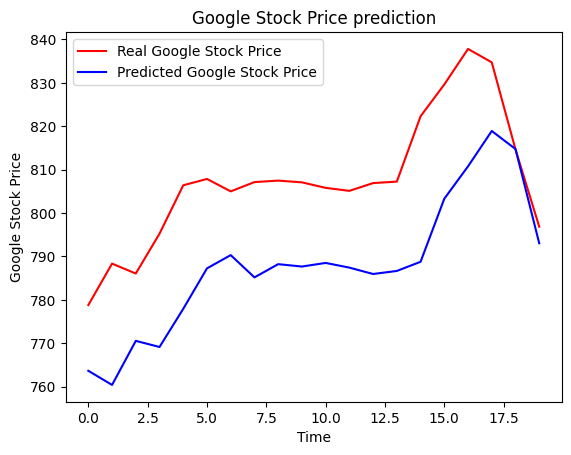

In [24]:
x_test = []
for i in range(timesteps, 70):
    if len(inputs[i-timesteps:i, 0]) == timesteps:
        x_test.append(inputs[i-timesteps:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicte_stock_price = regressor.predict(x_test)
predicte_stock_price = scaler.inverse_transform(predicte_stock_price)

plt.plot(real_stock_price, color = "red", label = "Real Google Stock Price")
plt.plot(predicte_stock_price, color = "blue", label = "Predicted Google Stock Price")
plt.title("Google Stock Price prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()